In [8]:
# from pycaret.datasets
import pandas as pd
import pathlib
# from glob import glob
import re

datasets = []
data_txt_lists= pathlib.Path("./fork/").glob("*.txt")


for dset in data_txt_lists:

    dataset_pre = pd.read_csv(dset, sep="\t", header=0, skiprows=1)
    foodname = re.sub(r"\d+\.txt$", "", dset.name)
    dataset_pre['item'] = foodname
    datasets.append(dataset_pre)

In [12]:
dataset = pd.concat(datasets, axis=0)
dataset = dataset.reset_index(drop=True)
dataset.tail()

,address,Time(s),ax(g),ay(g),az(g),wx(deg/s),wy(deg/s),wz(deg/s),AngleX(deg),AngleY(deg),AngleZ(deg),T(°),Voltage(v),item
232864,0x50,21:15:05.057,0.0869,-0.3345,-0.9663,-4.0283,-1.1597,-1.9531,-161.2903,-3.8452,142.8992,30.41,4.0,steak
232865,0x50,21:15:05.057,0.0869,-0.3345,-0.9663,-4.0283,-1.1597,-1.9531,-161.3342,-3.8452,142.9211,30.41,4.0,steak
232866,0x50,21:15:05.057,0.0854,-0.3262,-0.9585,-0.7935,-3.9063,-0.7324,-161.3562,-3.8287,142.9321,30.42,4.0,steak
232867,0x50,21:15:05.057,0.0854,-0.3262,-0.9585,-0.7935,-3.9063,-0.7324,-161.3617,-3.8013,142.9486,30.42,4.0,steak
232868,0x50,21:15:05.057,0.0884,-0.3052,-0.9331,2.7466,-5.5542,-0.3052,-161.3562,-3.7628,142.9651,30.40,4.0,steak


In [13]:
data = dataset.sample(frac =0.95, random_state = 786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (221226, 14)
Unseen Data For Predictions: (11643, 14)


In [14]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'item', session_id=123) 


,Description,Value
0,Session id,123
1,Target,item
2,Target type,Multiclass
3,Target mapping,"cake: 0, pasta: 1, sarada: 2, steak: 3"
4,Original data shape,"(221226, 14)"
5,Transformed data shape,"(221226, 14)"
6,Transformed train set shape,"(154858, 14)"
7,Transformed test set shape,"(66368, 14)"
8,Numeric features,11
9,Categorical features,2


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999,2.5630
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,10.4410
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,98.3840
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.8990
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.5000
knn,K Neighbors Classifier,0.9890,0.9990,0.9890,0.9891,0.9890,0.9851,0.9851,4.6340
ada,Ada Boost Classifier,0.9681,0.9992,0.9681,0.9753,0.9673,0.9568,0.9591,8.6540
lda,Linear Discriminant Analysis,0.9597,0.9915,0.9597,0.9650,0.9606,0.9454,0.9465,2.4250
lr,Logistic Regression,0.9567,0.9950,0.9567,0.9588,0.9567,0.9411,0.9419,22.9860
nb,Naive Bayes,0.9552,0.9972,0.9552,0.9609,0.9563,0.9393,0.9403,2.2210


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [16]:
svm = create_model('svm')
# svm = create_model('rbfsvm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8730,0.0000,0.8730,0.8805,0.8744,0.8280,0.8294
1,0.8696,0.0000,0.8696,0.8738,0.8708,0.8230,0.8236
2,0.8754,0.0000,0.8754,0.8766,0.8754,0.8305,0.8309
3,0.8770,0.0000,0.8770,0.8816,0.8771,0.8333,0.8346
4,0.8668,0.0000,0.8668,0.8717,0.8669,0.8196,0.8209
5,0.8718,0.0000,0.8718,0.8730,0.8721,0.8255,0.8257
6,0.8703,0.0000,0.8703,0.8769,0.8723,0.8241,0.8249
7,0.8696,0.0000,0.8696,0.8726,0.8705,0.8227,0.8231
8,0.8725,0.0000,0.8725,0.8804,0.8736,0.8275,0.8292


In [17]:
tuned_svm = tune_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9257,0.0000,0.9257,0.9258,0.9257,0.8987,0.8987
1,0.9188,0.0000,0.9188,0.9208,0.9186,0.8893,0.8901
2,0.9292,0.0000,0.9292,0.9293,0.9292,0.9036,0.9036
3,0.9272,0.0000,0.9272,0.9272,0.9272,0.9008,0.9009
4,0.9292,0.0000,0.9292,0.9292,0.9292,0.9035,0.9035
5,0.9294,0.0000,0.9294,0.9295,0.9294,0.9037,0.9037
6,0.9332,0.0000,0.9332,0.9337,0.9333,0.9090,0.9091
7,0.9255,0.0000,0.9255,0.9255,0.9254,0.8984,0.8985
8,0.9285,0.0000,0.9285,0.9288,0.9286,0.9026,0.9026


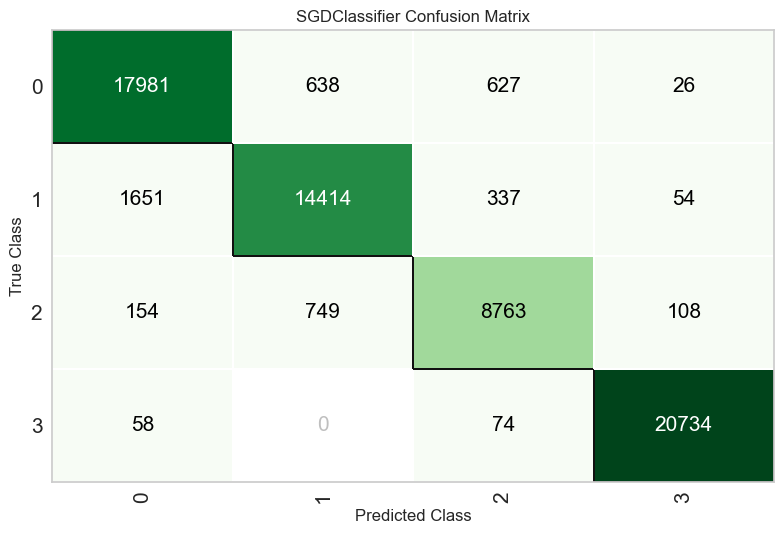

In [18]:
# plot_model(tuned_svm, plot = 'auc')
plot_model(tuned_svm, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

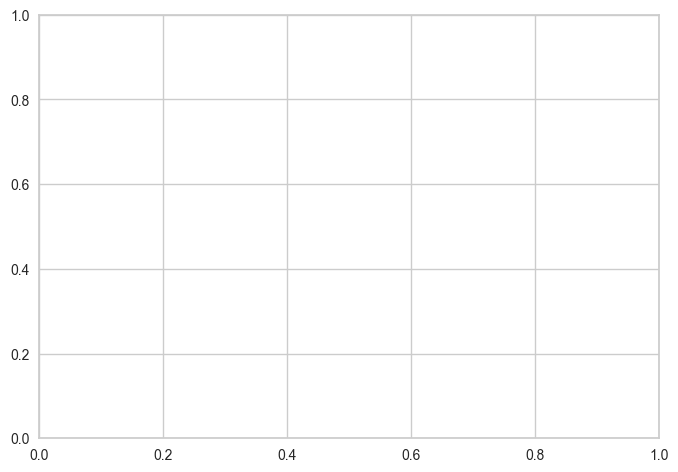

In [19]:
evaluate_model(tuned_svm)

In [ ]:
final_svm = finalize_model(tuned_svm)
unseen_predictions = predict_model(final_svm, data=data_unseen)
unseen_predictions.head()

In [64]:
# データを一つ選ぶ

single_data = data_unseen.iloc[1, :].values.reshape(1, -1)
single_data = pd.DataFrame(single_data.reshape(1, -1), columns=data_unseen.columns).drop(['item'], axis=1)

# neodata = single_data.drop(['item'], axis=1)

# single_data = single_data.to_frame().T

# 予測結果と所属確率を取得
prediction_probabilities = predict_model(final_svm, data=single_data)

prediction_probabilities

,address,Time(s),ax(g),ay(g),az(g),wx(deg/s),wy(deg/s),wz(deg/s),AngleX(deg),AngleY(deg),AngleZ(deg),T(°),Voltage(v),prediction_label
0,0x50,14:22:44.542,0.0347,-0.0825,1.002,-1.6479,2.8076,1.3428,-4.444,-2.45,127.2162,24.42,3.64,pasta


import bluetooth

def read_data_from_device(bd_addr, port):
    sock=bluetooth.BluetoothSocket( bluetooth.RFCOMM )
    sock.connect((bd_addr, port))
    data = sock.recv(1024)
    sock.close()
    return data

def main():
    bd_addr = "00:11:22:33:44:55" # BluetoothデバイスのMACアドレス
    port = 1
    data = read_data_from_device(bd_addr, port)
    print("Received data: ", data)

if __name__ == "__main__":
    main()
